## API Gallica SRU : scénario <i>Titanic</i>

In [1]:
import requests

### Construire la requête sur le mot-clé "titanic" et appeler l'API SRU Gallica

In [2]:
# URL de base du service SRU
BASEURL = 'https://gallica.bnf.fr/SRU?version=1.2&operation=searchRetrieve&maximumRecords=50&query='
# URL de base du service ContentSearch
BASESEARCH = 'https://gallica.bnf.fr/services/ContentSearch?ark='
# URL de base Gallica
BASEGALLICA = 'https://gallica.bnf.fr/ark:/12148/'
# URL de base Gallica/IIIF
BASEIIIF ='https://gallica.bnf.fr/iiif/ark:/12148/'
# URL de base du service de calendrier pour les périodiques 
ISSUEURL = 'https://gallica.bnf.fr/services/Issues?ark='

# la requête Gallica avec le mot-clé "titanic"   
req_url = "".join([BASEURL, 'gallica%20all%20%22titanic%22'])
print ("... appel de l'API Gallica SRU : ",req_url)
r = requests.get(req_url)
print (r.status_code)
print (r.encoding)
print (r.text)


... appel de l'API Gallica SRU :  https://gallica.bnf.fr/SRU?version=1.2&operation=searchRetrieve&maximumRecords=50&query=gallica%20all%20%22titanic%22
200
UTF-8
<?xml version="1.0" encoding="UTF-8" standalone="yes"?>
<srw:searchRetrieveResponse xmlns:ns5="http://gallica.bnf.fr/namespaces/gallica/" xmlns:oai_dc="http://www.openarchives.org/OAI/2.0/oai_dc/" xmlns:srw="http://www.loc.gov/zing/srw/" xmlns:dc="http://purl.org/dc/elements/1.1/">
    <srw:version>1.2</srw:version>
    <srw:echoedSearchRetrieveRequest>
        <srw:query>gallica all "titanic"</srw:query>
        <srw:version>1.2</srw:version>
    </srw:echoedSearchRetrieveRequest>
    <srw:numberOfRecords>6706</srw:numberOfRecords>
    <srw:extraResponseData>&lt;numberOfRecordsDecollapser&gt;45480&lt;/numberOfRecordsDecollapser&gt;</srw:extraResponseData>
    <srw:records>
        <srw:record>
            <srw:recordSchema>http://www.openarchives.org/OAI/2.0/OAIdc.xsd</srw:recordSchema>
            <srw:recordPacking>xml</srw

<b>Résultat</b> : 6687 documents de tout type (information donnée dans l'élément XML <srw:numberOfRecords>)

### Utiliser le service de facettes pour obtenir la répartition selon les types de documents

In [3]:
# URL de base du service de facettes 
CATEGORIEURL = 'https://gallica.bnf.fr/services/Categories?SRU='

# la requête de facettage  
req_url = "".join([CATEGORIEURL, 'gallica%20all%20%22titanic%22'])
print ("... appel de l'API Gallica Categories : ",req_url)
r = requests.get(req_url)
print (r.status_code)

# parser la réponse JSON pour en extraire les types de documents
json_4img = r.json()
for j in json_4img:   
    if j.get('value') == 'typedoc':
        print (f" type de documents : {j.get('howMany')} {j.get('cleanValue')}")


... appel de l'API Gallica Categories :  https://gallica.bnf.fr/services/Categories?SRU=gallica%20all%20%22titanic%22
200
 type de documents : 4464 monographies
 type de documents : 2178 periodiques
 type de documents : 20 images
 type de documents : 20 sonores
 type de documents : 18 partitions
 type de documents : 5 manuscrits
 type de documents : 1 cartes


<b>Résultat : </b> Flux JSON avec les facettes. Les valeurs par types de document sont donnés par la clé "typedoc".

### Requête avancée n° 1 :  mot-clé= "titanic" / type de document = presse et revues / dates de fascicule = 15/04/1912 au 16/04/1912 

In [4]:
req_url = "".join([BASEURL, '(text%20all%20"titanic"%20%20and%20(dc.type%20all%20"fascicule")%20and%20(gallicapublication_date>="1912/04/15"%20and%20gallicapublication_date<="1912/04/16")&exactSearch=false&collapsing=true'])

print ("... appel de l'API Gallica SRU : ",req_url)
r = requests.get(req_url)
print (r.text)

... appel de l'API Gallica SRU :  https://gallica.bnf.fr/SRU?version=1.2&operation=searchRetrieve&maximumRecords=50&query=(text%20all%20"titanic"%20%20and%20(dc.type%20all%20"fascicule")%20and%20(gallicapublication_date>="1912/04/15"%20and%20gallicapublication_date<="1912/04/16")&exactSearch=false&collapsing=true
<?xml version="1.0" encoding="UTF-8" standalone="yes"?>
<srw:searchRetrieveResponse xmlns:ns5="http://gallica.bnf.fr/namespaces/gallica/" xmlns:oai_dc="http://www.openarchives.org/OAI/2.0/oai_dc/" xmlns:srw="http://www.loc.gov/zing/srw/" xmlns:dc="http://purl.org/dc/elements/1.1/">
    <srw:version>1.2</srw:version>
    <srw:echoedSearchRetrieveRequest>
        <srw:query>(text all "titanic"  and (dc.type all "fascicule") and (gallicapublication_date&gt;="1912/04/15" and gallicapublication_date&lt;="1912/04/16")</srw:query>
        <srw:version>1.2</srw:version>
    </srw:echoedSearchRetrieveRequest>
    <srw:numberOfRecords>73</srw:numberOfRecords>
    <srw:extraResponseData>

<b>Résultat</b> : 73 périodiques

### Recherche avancée n° 2 : utilisation du critère de recherche par proximité

In [5]:
req_url = "".join([BASEURL, '((%20text%20all%20"astor"%20%20prox/unit=word/distance=10%20"titanic"))%20and%20(dc.type%20all%20"fascicule")%20and%20(gallicapublication_date>="1912/04/15"%20and%20gallicapublication_date<="1914/04/16")'])

print ("... appel de l'API Gallica SRU : ",req_url)
r = requests.get(req_url)
print (r.text)


... appel de l'API Gallica SRU :  https://gallica.bnf.fr/SRU?version=1.2&operation=searchRetrieve&maximumRecords=50&query=((%20text%20all%20"astor"%20%20prox/unit=word/distance=10%20"titanic"))%20and%20(dc.type%20all%20"fascicule")%20and%20(gallicapublication_date>="1912/04/15"%20and%20gallicapublication_date<="1914/04/16")
<?xml version="1.0" encoding="UTF-8" standalone="yes"?>
<srw:searchRetrieveResponse xmlns:ns5="http://gallica.bnf.fr/namespaces/gallica/" xmlns:oai_dc="http://www.openarchives.org/OAI/2.0/oai_dc/" xmlns:srw="http://www.loc.gov/zing/srw/" xmlns:dc="http://purl.org/dc/elements/1.1/">
    <srw:version>1.2</srw:version>
    <srw:echoedSearchRetrieveRequest>
        <srw:query>(( text all "astor"  prox/unit=word/distance=10 "titanic")) and (dc.type all "fascicule") and (gallicapublication_date&gt;="1912/04/15" and gallicapublication_date&lt;="1914/04/16")</srw:query>
        <srw:version>1.2</srw:version>
    </srw:echoedSearchRetrieveRequest>
    <srw:numberOfRecords>79

<b>Résultat</b> : 79 périodiques

#### Parser le contenu XML de la réponse pour en extraire les réponses

In [6]:
from bs4 import BeautifulSoup as bs
bs_content = bs(r.text, "lxml")

# Extraire les identifiants de chaque document, stockés dans un élément <dc:identifier>
for ark in bs_content.find_all("dc:identifier"):
    print(ark.get_text())
    

https://gallica.bnf.fr/ark:/12148/cb328338028/date
ISSN 24295914
https://gallica.bnf.fr/ark:/12148/cb32757974m/date
ISSN 17752949
https://gallica.bnf.fr/ark:/12148/cb328479063/date
ISSN 12575917
https://gallica.bnf.fr/ark:/12148/cb328711647/date
ISSN 20223609
https://gallica.bnf.fr/ark:/12148/cb32759772v/date
https://gallica.bnf.fr/ark:/12148/cb34429261z/date
ISSN 11494034
https://gallica.bnf.fr/ark:/12148/cb32755951g/date
ISSN 21257531
https://gallica.bnf.fr/ark:/12148/cb327596899/date
https://gallica.bnf.fr/ark:/12148/cb32847124t/date
ISSN 12576093
https://gallica.bnf.fr/ark:/12148/cb32806487g/date
https://gallica.bnf.fr/ark:/12148/cb32832672n/date
ISSN 12560413
https://gallica.bnf.fr/ark:/12148/cb34431794k/date
ISSN 11501073
https://gallica.bnf.fr/ark:/12148/cb328066631/date
ISSN 12560286
https://gallica.bnf.fr/ark:/12148/cb343631418/date
ISSN 02426412
https://gallica.bnf.fr/ark:/12148/cb32854011p/date
ISSN 22645691
https://gallica.bnf.fr/ark:/12148/cb32771891w/date
ISSN 12559997
ht

<b>Résultat</b> : une liste d'identifiants de notice de périodique. Le comportement par défaut de Gallica est de renvoyer des titres de périodique et non des fascicules

#### Extraire les documents eux-mêmes : le paramètre collapsing=false permet d'obtenir les numéros des fascicules correspondant à la requête

In [7]:
req_url = "".join([BASEURL, '((%20text%20all%20"astor"%20%20prox/unit=word/distance=10%20"titanic"))%20and%20(dc.type%20all%20"fascicule")%20and%20(gallicapublication_date>="1912/04/15"%20and%20gallicapublication_date<="1914/04/16")&collapsing=false'])

print ("... appel de l'API Gallica SRU : ",req_url)
r = requests.get(req_url)
bs_content = bs(r.text, "lxml")
for record in bs_content.find_all("srw:record"):
    print(record.find("dc:title").get_text())
    print(record.find("dc:identifier").get_text())    


... appel de l'API Gallica SRU :  https://gallica.bnf.fr/SRU?version=1.2&operation=searchRetrieve&maximumRecords=50&query=((%20text%20all%20"astor"%20%20prox/unit=word/distance=10%20"titanic"))%20and%20(dc.type%20all%20"fascicule")%20and%20(gallicapublication_date>="1912/04/15"%20and%20gallicapublication_date<="1914/04/16")&collapsing=false
La Patrie créole : organe des intérêts généraux de l'île de La Réunion
https://gallica.bnf.fr/ark:/12148/bpt6k50399793
Le XIXe siècle : journal quotidien politique et littéraire / directeur-rédacteur en chef : Gustave Chadeuil
https://gallica.bnf.fr/ark:/12148/bpt6k7569211j
Le Rappel / directeur gérant Albert Barbieux
https://gallica.bnf.fr/ark:/12148/bpt6k7548645v
Le Sourire : journal humoristique hebdomadaire / Maurice Méry, directeur ; Alphonse Allais, rédacteur en chef
https://gallica.bnf.fr/ark:/12148/bpt6k11700826
L'Écho d'Oran : journal d'annonces légales, judiciaires, administratives et commerciales de la province d'Oran
https://gallica.bnf.

<b>Résultat</b> : les 50 premiers titres et identifiants des numéros correspondant à la requête

### Obtenir le calendrier d'un périodique avec le service de récupération des années et fascicules parus. Exemple avec le premier numéro résultat de la recherche précédente : <i>La Patrie créole</i>

In [8]:
import datetime

# Obtenir le premier résultat de la liste des résultats
numero = bs_content.find("srw:record")
print(" titre : ", numero.find("dc:title").get_text())

# obtenir la date de publication du numéro pour en déduire l'année de publication
myDate = numero.find("dc:date").get_text()
print(" date : ", myDate)
dateObj = datetime.datetime.strptime(myDate, '%Y-%m-%d')

# obtenir l'identifiant de la notice catalogue du titre
print( " notice : ", numero.find("dc:relation").get_text())  

# Utiliser l'API Issue avec l'identifiant ark de la notice et l'année recherchée
ark = numero.find("dc:relation").get_text().split(".fr/")[1]
req_url = "".join([ISSUEURL, ark, '/date&date=', str(dateObj.year)])

print ("\n... appel de l'API Gallica Issue : ",req_url)
r = requests.get(req_url)
print (r.text)

 titre :  La Patrie créole : organe des intérêts généraux de l'île de La Réunion
 date :  1912-06-20
 notice :  Notice du catalogue : http://catalogue.bnf.fr/ark:/12148/cb328338028

... appel de l'API Gallica Issue :  https://gallica.bnf.fr/services/Issues?ark=ark:/12148/cb328338028/date&date=1912
<?xml version="1.0" encoding="UTF-8" standalone="no"?>
<issues compile_time="0:00:08.085" date="1912" listType="issue" parentArk="ark:/12148/cb328338028/date">
<issue ark="bpt6k5039919t" dayOfYear="2">02 janvier 1912</issue>
<issue ark="bpt6k5039920g" dayOfYear="4">04 janvier 1912</issue>
<issue ark="bpt6k5039921w" dayOfYear="5">05 janvier 1912</issue>
<issue ark="bpt6k50399229" dayOfYear="6">06 janvier 1912</issue>
<issue ark="bpt6k5039918d" dayOfYear="7">07 janvier 1912</issue>
<issue ark="bpt6k5039923q" dayOfYear="8">08 janvier 1912</issue>
<issue ark="bpt6k50399244" dayOfYear="10">10 janvier 1912</issue>
<issue ark="bpt6k5039925j" dayOfYear="11">11 janvier 1912</issue>
<issue ark="bpt6k50

<b>Résultat</b> : le calendrier du titre pour l'année 1912

#### Trouver les numéros publiés les jours suivant celui du document résultat

In [9]:
numeros = []
dates = []

# calculer le jour de publication du numéro sous la forme d'un ordinal
janvier01 = datetime.datetime.strptime("1912-01-01", '%Y-%m-%d')
diff = (dateObj - janvier01).days + 1

# chercher un numéro dans les 5 jours qui suivent
bs_content = bs(r.text, "lxml")
for i in range(5):
    jourSuiv = diff+i
    numero = bs_content.find("issue", {"dayofyear" : jourSuiv})
    if numero:
        print (f" jour : {jourSuiv} / ID : {numero['ark']}"  )
        numeros.append(numero['ark'])  
        dates.append(numero.get_text()) 
  
print (dates)

 jour : 172 / ID : bpt6k50399793
 jour : 173 / ID : bpt6k5039980r
 jour : 174 / ID : bpt6k50399815
 jour : 175 / ID : bpt6k5039982k
 jour : 176 / ID : bpt6k50399830
['20 juin 1912', '21 juin 1912', '22 juin 1912', '23 juin 1912', '24 juin 1912']


<b>Résultat</b> : les numéros suivants le 20 juin 1912 (inclus)

### Produire une revue de presse à partir d'extraits de ces numéros

#### Obtenir les extraits de texte (requête = 'titanic')

In [19]:
from PIL import Image 
import os, fnmatch

pages = []
revue = "./revue"

# Obtenir les pages concernées pour chaque numéro avec l'API ContentSearch   
for n in numeros:    
    req_url = "".join([BASESEARCH,n,'&query=titanic'])
    print ("\n... appel de l'API Gallica ContentSearch : ",req_url)
    r = requests.get(req_url)
    bs_content = bs(r.text, "lxml")
    # obtenir le numéro de page
    hits = bs_content.find_all("p_id")
    print (hits)
    pages.append(hits)
    # obtenir l'extrait de texte
    extraits = bs_content.find_all("content")
    print (extraits)


... appel de l'API Gallica ContentSearch :  https://gallica.bnf.fr/services/ContentSearch?ark=bpt6k50399793&query=titanic
[<p_id>PAG_2</p_id>, <p_id>PAG_3</p_id>]
[<content>A Travers l’Actualité Les Astor La mort du colonel Astor sur le &lt;span class='highlight'&gt;Titanic&lt;/span&gt; appelle l’attention sur la dynastie des Astor, dont voici l’histoire : « Jacob Astor, 81, rue de la Reine, deux maisons plus loin que la salle de réunion des Amis(...)</content>, <content>Il laissait deux fils: l’aîné, Jean-Jacob second du nom, mourut en 1890 laissant à son fils William Waldorf 625 millions le cadet William mourut en 1892 laissant 350 millions à son fils Jean-Jacob celui qui vient de périr avec le &lt;span class='highlight'&gt;Titanic&lt;/span&gt;— e 1275(...)</content>]

... appel de l'API Gallica ContentSearch :  https://gallica.bnf.fr/services/ContentSearch?ark=bpt6k5039980r&query=titanic
[<p_id>PAG_3</p_id>]
[<content>Annale « Coloniale» En mémoire du « &lt;span class='highlight'&g

<b>Résultat</b> : les cinq extraits (et leur page) trouvés dans les numéros du 20 juin 1912 au 24 juin 1912, 

#### Obtenir des vignettes d'extraits de texte autour des occurrences 

[[<p_id>PAG_2</p_id>, <p_id>PAG_3</p_id>], [<p_id>PAG_3</p_id>], [], [<p_id>PAG_2</p_id>], []]
... appel de l'API Gallica ContentSearch : document bpt6k50399793, page 2 
https://gallica.bnf.fr/services/ContentSearch?ark=bpt6k50399793&query=titanic&page=2
 ->  https://gallica.bnf.fr/iiif/ark:/12148/bpt6k50399793/f2/3564,3902,1200,500/full/0/native.jpg
 ->  https://gallica.bnf.fr/iiif/ark:/12148/bpt6k50399793/f2/2985,3940,1200,500/full/0/native.jpg
... appel de l'API Gallica ContentSearch : document bpt6k50399793, page 3 
https://gallica.bnf.fr/services/ContentSearch?ark=bpt6k50399793&query=titanic&page=3
 ->  https://gallica.bnf.fr/iiif/ark:/12148/bpt6k50399793/f3/227,1485,1200,500/full/0/native.jpg
... appel de l'API Gallica ContentSearch : document bpt6k5039980r, page 3 
https://gallica.bnf.fr/services/ContentSearch?ark=bpt6k5039980r&query=titanic&page=3
 ->  https://gallica.bnf.fr/iiif/ark:/12148/bpt6k5039980r/f3/1251,1979,1200,500/full/0/native.jpg
 ->  https://gallica.bnf.fr/iiif/a

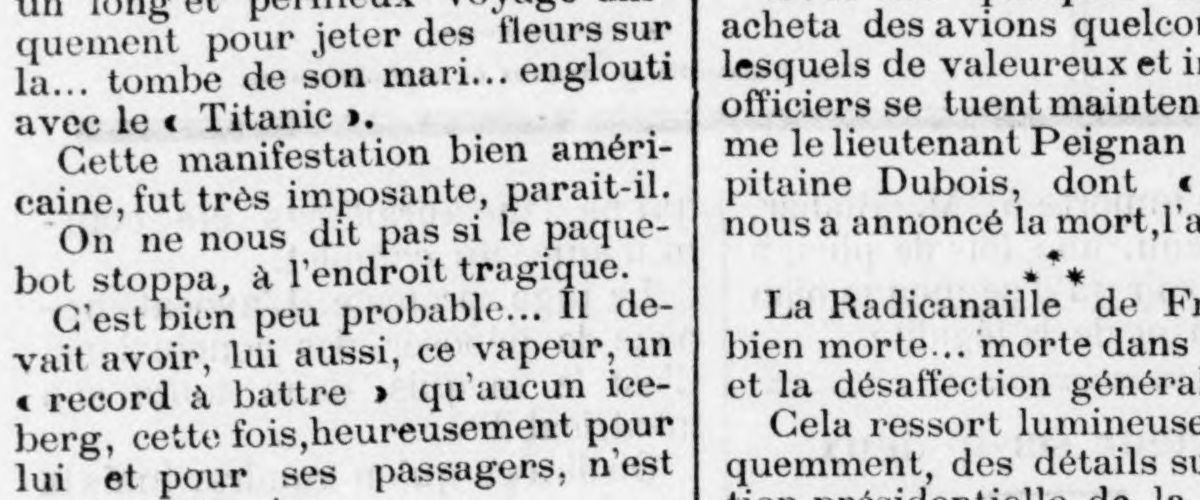

./revue20_juin_1912.jpg


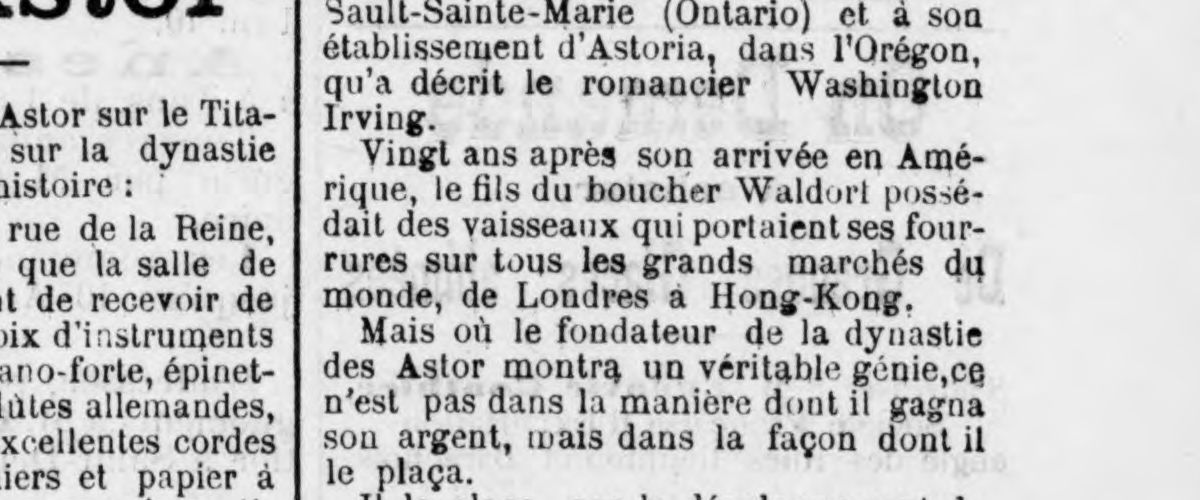

./revue21_juin_1912+.jpg


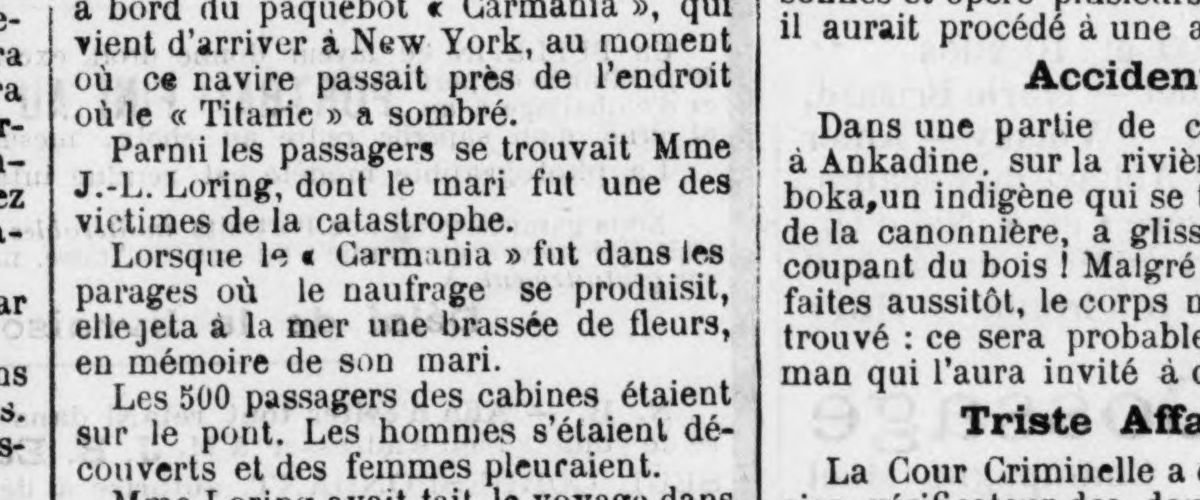

./revue20_juin_1912+.jpg


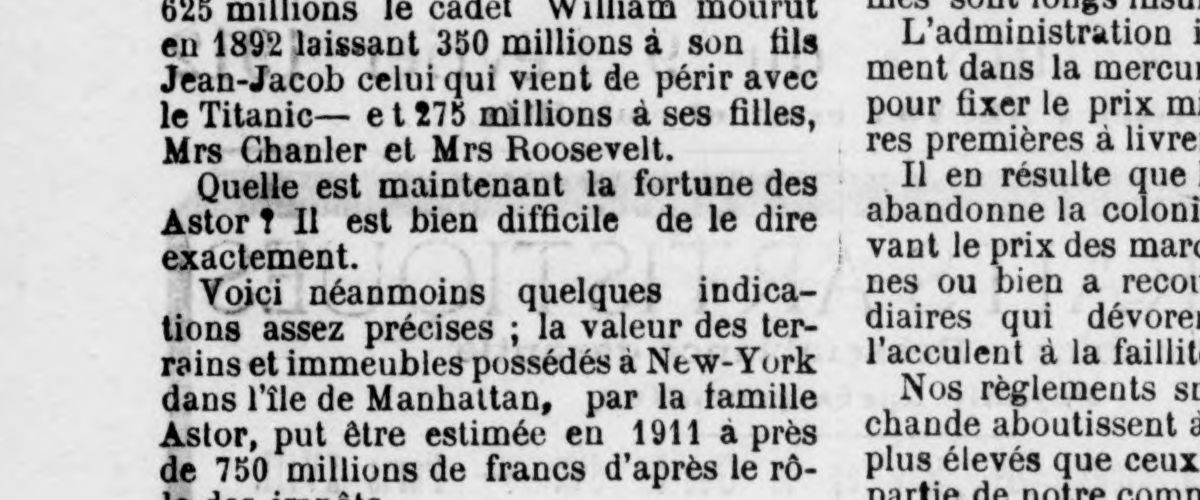

./revue21_juin_1912.jpg


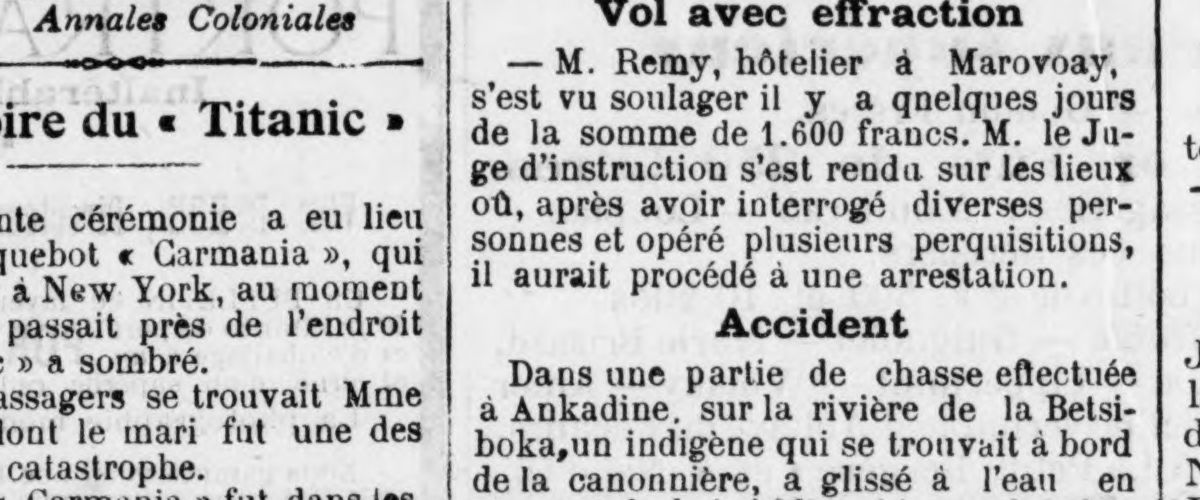

In [23]:
URLiiif = []

def path_to_pil(folder, file):
    print ("--- loading image ",file,"...")
    img = Image.open(folder+file)
    return img

# extraire un fichier image à partir d'une URL iiif
def ark_to_file(list): # URL, indice du numéro
    response = requests.get(list[0]) 
    print (list[0])
    date = dates[list[1]]
    filename = "".join([revue,date])
    filename = filename.replace(" ", "_")
    if os.path.exists(filename + ".jpg"):
        filename += "+"
    filename += ".jpg"
    file = open(filename, "wb")
    file.write(response.content)
    file.close()   

print (pages)
    
# Obtenir les zones concernées sur les pages trouvées précédemment par l'API.  
# L'API est désormais appelée avec le paramètre page
for i,e in enumerate(pages):
    for p in e:
        #print (p)
        f = p.string.split("_")[1]
        req_url = "".join([BASESEARCH,numeros[i],'&query=titanic&page=',f])   
        print (f"... appel de l'API Gallica ContentSearch : document {numeros[i]}, page {f} ")
        print (req_url)
        r = requests.get(req_url)
        bs_content = bs(r.text, "lxml")
        # obtenir les coordonnées du mot dans l'OCR ALTO
        hits = bs_content.find_all("altoidstring")
        for h in hits:
            x = int(h.get("hpos")) - 200
            y = int(h.get("vpos")) - 100
            # construire la requête IIIF
            req_url = "".join([BASEIIIF,numeros[i],"/f",f,"/",str(x),",",str(y),",1200,500/full/0/native.jpg"])
            print (" -> ",req_url)
            URLiiif.append((req_url,i))
 
newpath = r'./revue' 
if not os.path.exists(newpath):
    os.makedirs(newpath)

print ("\n... extraire les vignettes IIIF")
[ark_to_file(u) for u in URLiiif]

out_paths = fnmatch.filter(os.listdir(revue), '*.jpg')
print (out_paths)
annotated_images = [path_to_pil(revue,e) for e in out_paths]
for im in annotated_images:
    print (im.filename)
    display(im)


<b>Résultat</b> : les vignettes centrées autour des occurrences pour les cinq extraits